For that lab we will need keras, so go to your python.exe location and run:

`python -m pip install keras`

That will install keras and tensorflow libraries for you.

For model visualization we will also need [graphviz](https://graphviz.gitlab.io/_pages/Download/Download_windows.html) lib, so also please navigate to the link and install it, also adding it ti PATH variable.

We will work firstly with pretrained model:

In [1]:
import pydot
import numpy as np 
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
import keras
import numpy as np 

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [71]:


model = keras.applications.vgg16.VGG16()

### Getting weight and layers data 

Let us visualize this model

And also see the shapes of weights

In [72]:
weights = model.get_weights()
for weight in weights:
    print(weight.shape)

(3, 3, 3, 64)
(64,)
(3, 3, 64, 64)
(64,)
(3, 3, 64, 128)
(128,)
(3, 3, 128, 128)
(128,)
(3, 3, 128, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 256)
(256,)
(3, 3, 256, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(3, 3, 512, 512)
(512,)
(25088, 4096)
(4096,)
(4096, 4096)
(4096,)
(4096, 1000)
(1000,)


In [73]:
layers = model.layers
for layer in layers:
    print(layer)

In [74]:
len(layers), len(weights)

(23, 32)

You might notice that the number of weights is greater than the number of layers. This is because we also have bias weights, in which we are not currently inerested in.

### Task 1 
Visualize weights from the input layer

In [101]:
l1 = model.get_weights()[0]
#l1 = l1.reshape((64,3,3,3))
l1[0].shape

(3, 3, 64)

<Figure size 432x288 with 0 Axes>

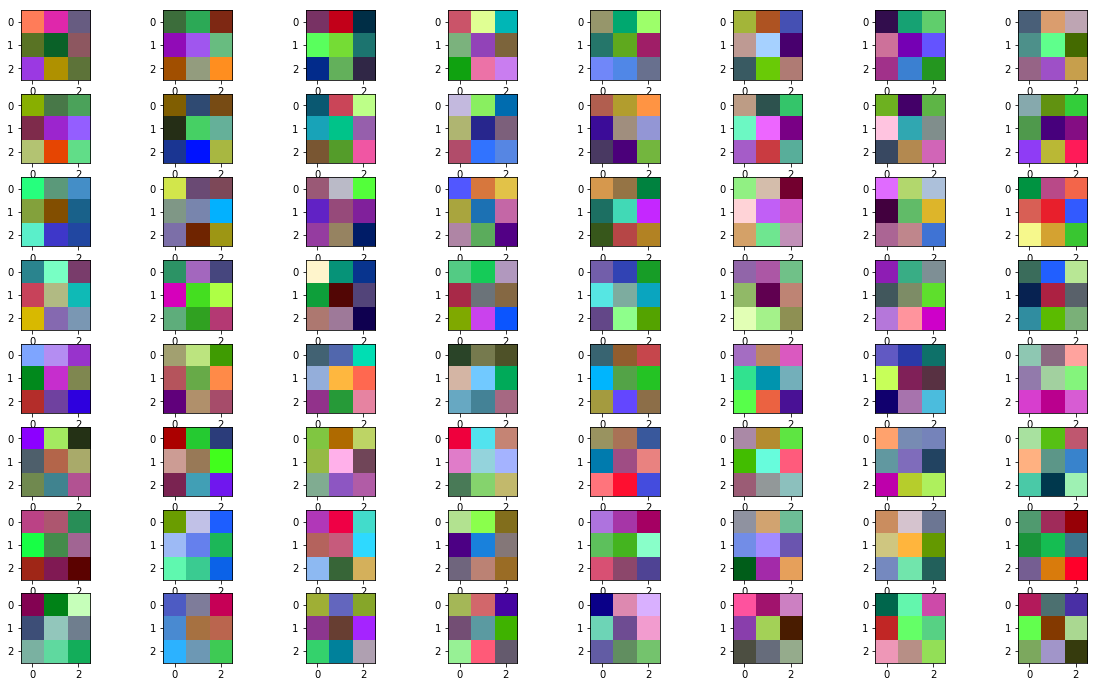

In [100]:


# your code to get filter from weights and than transform to the shape, that is compatible with cv2
# please notice the shape of the layer 
img = l1[0]



cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
fig = plt.figure()
row_size = 8
col_size = 8
fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
activation_index=0
for row in range(0,row_size):
    for col in range(0,col_size):
        cv2.normalize(l1[activation_index],  l1[activation_index], 0, 255, cv2.NORM_MINMAX)
        ax[row][col].imshow(l1[activation_index].astype('uint8'))
        #print(activation_index)
        activation_index += 1

 #   ax1.imshow(img.astype('uint8'), )

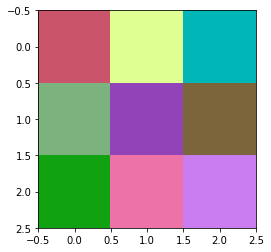

In [97]:


# your code to get filter from weights and than transform to the shape, that is compatible with cv2
# please notice the shape of the layer 
img = l1[3]



cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.imshow(img.astype('uint8'))

### Task 2

Feed an image to the model and get an output image from some layer

You can see the output from each layer using this [guide](https://stackoverflow.com/a/41712013)

In [111]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
# load an image from file
img = load_img('D:\\Study\\ImP\\dog.jpg', target_size=(224, 224, 3))
# convert the image pixels to a numpy array
img = img_to_array(img)
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))

# prepare the image for the VGG model
img = preprocess_input(img)

In [112]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [113]:
y = model.predict(img)

In [149]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers[1:]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    print (activation.shape)
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

(1, 224, 224, 64)


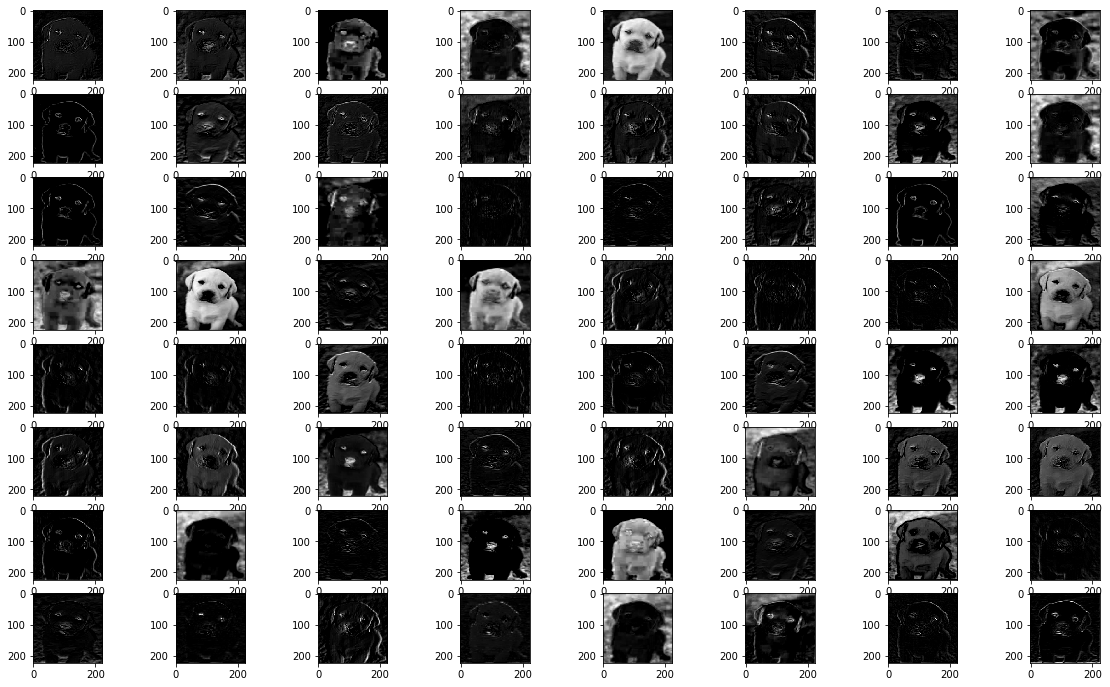

In [151]:
display_activation(activations, 8, 8, 1)

### Task 3 

Classify cats and dogs images with [features from CNN](https://keras.io/applications/#extract-features-with-vgg16) using SVM/KNN/etc...

### Building your own model

Consider the NON-working example below (x_train not defined)

In [166]:
model_2.layers[-2]

In [15]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
model = VGG16(weights='imagenet', include_top=False)

In [178]:
for ind, image_path,  in enumerate(os.listdir('D:\\Study\\ImP\\nsu-computer-vision-master\\English Seminars\\train')):
    if ind % 50 !=0:
        #print ('test')
        continue
    print (image_path)
    if image_path.find('cat')!=-1:
        list_of_labels.append(1)
    else:
        list_of_labels.append(0)
    img = image.load_img('D:\\Study\\ImP\\nsu-computer-vision-master\\English Seminars\\train'+'\\'+image_path, target_size=(224, 224,3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    list_of_features.append(model_2.predict(x)[0].flatten())
    

cat.0.jpg
cat.10041.jpg
cat.10087.jpg
cat.10131.jpg
cat.10177.jpg
cat.10221.jpg
cat.10267.jpg
cat.10311.jpg
cat.10357.jpg
cat.10401.jpg
cat.10447.jpg
cat.10492.jpg
cat.10537.jpg
cat.10582.jpg
cat.10627.jpg
cat.10672.jpg
cat.10717.jpg
cat.10762.jpg
cat.10807.jpg
cat.10852.jpg
cat.10898.jpg
cat.10942.jpg
cat.10988.jpg
cat.11031.jpg
cat.11077.jpg
cat.11121.jpg
cat.11167.jpg
cat.11211.jpg
cat.11257.jpg
cat.11301.jpg
cat.11347.jpg
cat.11392.jpg
cat.11437.jpg
cat.11482.jpg
cat.11527.jpg
cat.11572.jpg
cat.11617.jpg
cat.11662.jpg
cat.11707.jpg
cat.11752.jpg
cat.11798.jpg
cat.11842.jpg
cat.11888.jpg
cat.11932.jpg
cat.11978.jpg
cat.12021.jpg
cat.12067.jpg
cat.12111.jpg
cat.12157.jpg
cat.12201.jpg
cat.12247.jpg
cat.12292.jpg
cat.12337.jpg
cat.12382.jpg
cat.12427.jpg
cat.12472.jpg
cat.1268.jpg
cat.1312.jpg
cat.1358.jpg
cat.1402.jpg
cat.1448.jpg
cat.1493.jpg
cat.1538.jpg
cat.1583.jpg
cat.1628.jpg
cat.1673.jpg
cat.1718.jpg
cat.1763.jpg
cat.1808.jpg
cat.1853.jpg
cat.1899.jpg
cat.1943.jpg
cat.1989.jpg

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
clf = KNeighborsClassifier(n_neighbors=2)

In [179]:
list_of_features[0].shape

(25088,)

In [183]:
clf.fit(list_of_features[::2], list_of_labels[::2])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [188]:
clf.predict(list_of_features[1::2])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1])

In [189]:
from sklearn.metrics import roc_auc_score
roc_auc_score(clf.predict(list_of_features[1::2]), list_of_labels[1::2])

0.8522920203735144

### Task 4

Create your own simple architecture and train CNN on [MNIST](https://keras.io/datasets/#mnist-database-of-handwritten-digits) dataset. Note that MNIST is 1 color channel dataset.
Test it on some hard images from the web, [such as](https://www.wpclipart.com/education/animal_numbers/animal_number_2.png).

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [249]:
img_rows, img_cols = 28, 28

In [250]:
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [251]:
# Преобразование размерности изображений
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [252]:
# Нормализация данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [253]:
# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [136]:
# Создаем последовательную модель
model_3 = Sequential()

model_3.add(Conv2D(75, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(100, (3, 3), activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(120, kernel_size=(3, 3), input_shape=input_shape))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.2))
model_3.add(())
model_3.add(Dense(500, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

In [141]:
# Компилируем модель
model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model_3.summary())

# Обучаем сеть
model_3.fit(X_train, Y_train, batch_size=32, epochs=12, validation_split=0.2, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 75)        750       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 75)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 13, 13, 75)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 100)       67600     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 100)         0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 5, 5, 100)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 120)         108120    
__________

KeyboardInterrupt: 

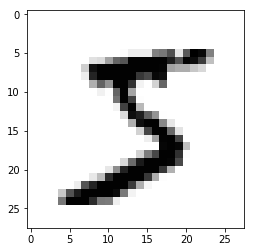

In [19]:
img = X_train[0]

cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
#fig = plt.figure()

plt.imshow(255 - img.reshape((28,28)), cmap='gray')

#cv2.imshow(img)
#ax1 = figimg.add_subplot(1,1,1)
#ax1.imshow(img)#.astype('uint8'))

In [17]:
img = X_train[0]
model_3.predict(255 - img.reshape((1, 28,28,1))).argmax()

8

In [18]:
img = X_train[0]
model_3.predict(img.reshape((1, 28,28,1))).argmax()

5

In [12]:
img = image.load_img('two)2.png', target_size=(28, 28,1))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [13]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [14]:
x = rgb2gray(x).reshape(1, 28, 28, 1)

In [15]:
model_3.predict(x)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Task 5

Augment MNIST data using [ImageDataGenerator](https://keras.io/preprocessing/image/) and color inversion + visualize (or save) augmented images.
Train our model on augmented data and compare the results on your images from the web.

In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [43]:
X_train.shape


(60000, 28, 28, 1)

In [96]:
X_train_inverted = 255 - X_train

In [99]:
X_train_all = np.concatenate((X_train, X_train_inverted), axis=0)
Y_train_all = np.concatenate((Y_train, Y_train), axis=0)

In [101]:
print(Y_train_all[0], Y_train_all[60000])
Y_train_all.shape, X_train_all.shape

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


((120000, 10), (120000, 28, 28, 1))

9


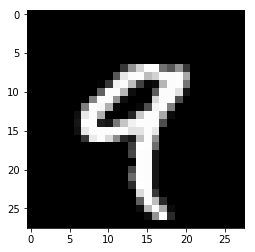

In [110]:
img = X_train_all[60004]
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
#fig = plt.figure()

plt.imshow(255 - img.reshape((28,28)), cmap='gray')
print(Y_train_all[60004].argmax())


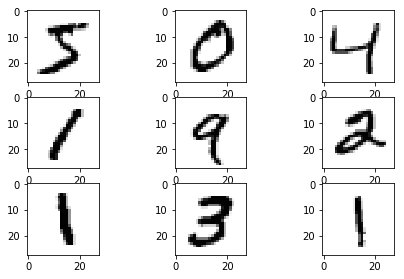

In [113]:
activation_index = 0
fig, ax = plt.subplots(3, 3, figsize=(3*2.5,3*1.5))
for row in range(0,3):
    for col in range(0,3):
        ax[row][col].imshow(X_train_inverted[activation_index].reshape((28,28)), cmap='gray')
        activation_index += 1

In [114]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

In [247]:
datagen.fit(X_train_inverted)

In [245]:
for x,y in datagen.flow(X_train_all, Y_train_all):
    print (x)
    break


[[[[ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]
   ...
   [ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]]

  [[ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]
   ...
   [ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]]

  [[ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]
   ...
   [ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]]

  ...

  [[ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]
   ...
   [ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]]

  [[ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]
   ...
   [ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]]

  [[ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]
   ...
   [ 1.0010091]
   [ 1.0010091]
   [ 1.0010091]]]


 [[[-1.0010396]
   [-1.0010396]
   [-1.0010396]
   ...
   [-1.0010396]
   [-1.0010396]
   [-1.0010396]]

  [[-1.0010396]
   [-1.0010396]
   [-1.0010396]
   ...
   [-1.0010396]
   [-1.0010396]
   [-1.0010396]]

  [[-1.0010396]
   [-1.0010396]
   [-1.0010396]
   ...
   [-1.0010396]
   [-1.0010396]
   [-1.0010396]]

  ...

  [[-1.0010396]
   [-1.0010396]
   [-1.

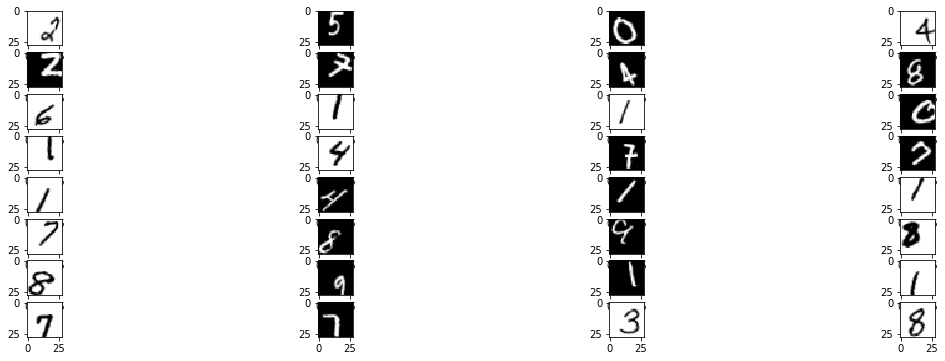

In [246]:
activation_index = 0
fig, ax = plt.subplots(8, 4, figsize=(8*2.5,4*1.5))
for row in range(0,8):
    for col in range(0,4):
        ax[row][col].imshow(x[activation_index].reshape((28,28)), cmap='gray')
        #print(y[activation_index].argmax())
        activation_index += 1

In [254]:
model_3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_3.fit_generator(datagen.flow(X_train_inverted, Y_train, batch_size=32),
                    steps_per_epoch=len(X_train_inverted)/32, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 83s 44ms/step - loss: 0.4869 - acc: 0.8477
Epoch 2/12
1875/1875 [==============================] - 85s 45ms/step - loss: 0.3712 - acc: 0.8837
Epoch 3/12
1875/1875 [==============================] - 93s 50ms/step - loss: 0.3485 - acc: 0.8920
Epoch 4/12
1875/1875 [==============================] - 94s 50ms/step - loss: 0.3219 - acc: 0.9008 1s - loss: 0.3218 -
Epoch 5/12
1875/1875 [==============================] - 86s 46ms/step - loss: 0.3101 - acc: 0.9022 4 - ETA: 1s - loss: 0.310
Epoch 6/12
1875/1875 [==============================] - 85s 45ms/step - loss: 0.3003 - acc: 0.9066 4s - loss: 0.30
Epoch 7/12
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2964 - acc: 0.9072
Epoch 8/12
1875/1875 [==============================] - 85s 46ms/step - loss: 0.2904 - acc: 0.9094
Epoch 9/12
1875/1875 [==============================] - 86s 46ms/step - loss: 0.2858 - acc: 0.9107
Epoch 10/12
1875/1875 [========================

9


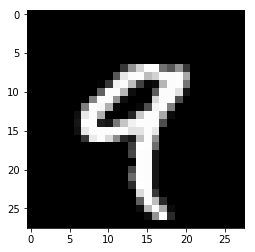

In [264]:
img = X_train_all[60004]
cv2.normalize(img,  img, 0, 255, cv2.NORM_MINMAX)
#fig = plt.figure()

plt.imshow(255 - img.reshape((28,28)), cmap='gray')
print(Y_train_all[60004].argmax())


In [265]:
img = X_train_all[60004]
model_3.predict(255 - img.reshape((1, 28,28,1))).argmax()

9

### Task 6
Use pretrained model to train on CIFAR-10 dataset. For that, you can try to use your CNN architecture.

In [144]:
from keras.datasets import cifar10


In [145]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Размер мини-выборки
batch_size = 32
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32

# Нормализуем данные
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


In [196]:
X_train.shape

(50000, 32, 32, 3)

In [231]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential, Model
model = VGG16(weights='imagenet', include_top=False, input_shape=(img_rows, img_cols, 3))

In [232]:
for layer in model.layers:
    print(layer)
    layer.trainable = False

In [233]:
add_model = Sequential()
add_model.add(Flatten(input_shape=model.output_shape[1:]))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dense(10, activation='softmax'))

model_cl = Model(inputs=model.input, outputs=add_model(model.output))

In [234]:
for layer in model_cl.layers[:-1]:
    print(layer.trainable)
    #layer.trainable = False

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [235]:

model_cl.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

print(model_cl.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [239]:
model_cl.fit(X_train, Y_train, batch_size=32, epochs=8)

Epoch 1/8
50000/50000 [==============================] - 281s 6ms/step - loss: 1.2460 - acc: 0.5636
Epoch 2/8
50000/50000 [==============================] - 281s 6ms/step - loss: 1.1408 - acc: 0.6002
Epoch 3/8
50000/50000 [==============================] - 280s 6ms/step - loss: 1.0819 - acc: 0.6209
Epoch 4/8
50000/50000 [==============================] - 279s 6ms/step - loss: 1.0362 - acc: 0.6363
Epoch 5/8
50000/50000 [==============================] - 279s 6ms/step - loss: 0.9970 - acc: 0.6504 2s - loss: 0.9
Epoch 6/8
50000/50000 [==============================] - 279s 6ms/step - loss: 0.9606 - acc: 0.6632
Epoch 7/8
50000/50000 [==============================] - 286s 6ms/step - loss: 0.9258 - acc: 0.6748
Epoch 8/8
50000/50000 [==============================] - 283s 6ms/step - loss: 0.8910 - acc: 0.6880 4s -


In [240]:
model_cl.evaluate(X_test, Y_test)

10000/10000 [==============================] - 57s 6ms/step


[1.1065845924377442, 0.6159]

### Task 7
Implement style transfer technique

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
model = VGG16(weights='imagenet', include_top=False)